# 十分钟上手 Pandas

`pandas` 是一个 `Python Data Analysis Library`。

安装请参考官网的教程，如果安装了 `Anaconda`，则不需要安装 `pandas` 库。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 产生 Pandas 对象

`pandas` 中有三种基本结构：

- `Series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

### Series

一维 `Series` 可以用一维列表初始化：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

print s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64


默认情况下，`Series` 的下标都是数字（可以使用额外参数指定），类型是统一的。

### DataFrame

`DataFrame` 则是个二维结构，这里首先构造一组时间序列，作为我们第一维的下标：

In [3]:
dates = pd.date_range('20130101', periods=6)

print dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


然后创建一个 `DataFrame` 结构：

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119
2013-01-06,0.317694,-1.014105,1.373131,1.406146


默认情况下，如果不指定 `index` 参数和 `columns`，那么他们的值将用从 `0` 开始的数字替代。

除了向 `DataFrame` 中传入二维数组，我们也可以使用字典传入数据：

In [5]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

### 头尾数据

`head` 和 `tail` 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119


最后 3 行：

In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119
2013-01-06,0.317694,-1.014105,1.373131,1.406146


### 下标，列标，数据

下标使用 `index` 属性查看：

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

列标使用 `columns` 属性查看：

In [10]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

数据值使用 `values` 查看：

In [11]:
df.values

array([[-0.55083944, -1.06256009, -0.08673293, -1.21942934],
       [-1.8371711 , -0.0201989 ,  0.44689325, -0.76534334],
       [ 0.63604155, -0.76348519, -0.13151874, -0.13450694],
       [-0.00895274, -0.10151492, -1.24743445,  0.36520826],
       [-0.21717827, -1.79161545, -0.77258698,  0.82711886],
       [ 0.31769363, -1.01410509,  1.37313135,  1.4061457 ]])

### 统计数据

查看简单的统计数据：

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.276734,-0.792247,-0.069708,0.079866
std,0.868545,0.662574,0.920201,0.984614
min,-1.837171,-1.791615,-1.247434,-1.219429
25%,-0.467424,-1.050446,-0.612320,-0.607634
50%,-0.113066,-0.888795,-0.109126,0.115351
75%,0.236032,-0.267007,0.313487,0.711641
max,0.636042,-0.020199,1.373131,1.406146


### 转置

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.550839,-1.837171,0.636042,-0.008953,-0.217178,0.317694
B,-1.062560,-0.020199,-0.763485,-0.101515,-1.791615,-1.014105
C,-0.086733,0.446893,-0.131519,-1.247434,-0.772587,1.373131
D,-1.219429,-0.765343,-0.134507,0.365208,0.827119,1.406146


## 排序

`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [14]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.317694,-1.014105,1.373131,1.406146
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429


In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.219429,-0.086733,-1.062560,-0.550839
2013-01-02,-0.765343,0.446893,-0.020199,-1.837171
2013-01-03,-0.134507,-0.131519,-0.763485,0.636042
2013-01-04,0.365208,-1.247434,-0.101515,-0.008953
2013-01-05,0.827119,-0.772587,-1.791615,-0.217178
2013-01-06,1.406146,1.373131,-1.014105,0.317694


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [16]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429
2013-01-06,0.317694,-1.014105,1.373131,1.406146
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343


## 索引

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

### 读取数据

选择单列数据：

In [17]:
df["A"]

2013-01-01   -0.550839
2013-01-02   -1.837171
2013-01-03    0.636042
2013-01-04   -0.008953
2013-01-05   -0.217178
2013-01-06    0.317694
Freq: D, Name: A, dtype: float64

也可以用 `df.A`：

In [18]:
df.A

2013-01-01   -0.550839
2013-01-02   -1.837171
2013-01-03    0.636042
2013-01-04   -0.008953
2013-01-05   -0.217178
2013-01-06    0.317694
Freq: D, Name: A, dtype: float64

使用切片读取多行：

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507


`index` 名字也可以进行切片：

In [20]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507


### 使用 `label` 索引

`loc` 可以方便的使用 `label` 进行索引：

In [21]:
df.loc[dates[0]]

A   -0.550839
B   -1.062560
C   -0.086733
D   -1.219429
Name: 2013-01-01 00:00:00, dtype: float64

多列数据：

In [22]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.550839,-1.062560
2013-01-02,-1.837171,-0.020199
2013-01-03,0.636042,-0.763485
2013-01-04,-0.008953,-0.101515
2013-01-05,-0.217178,-1.791615
2013-01-06,0.317694,-1.014105


选择多行多列：

In [23]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.837171,-0.020199
2013-01-03,0.636042,-0.763485
2013-01-04,-0.008953,-0.101515


数据降维：

In [24]:
df.loc['20130102',['A','B']]

A   -1.837171
B   -0.020199
Name: 2013-01-02 00:00:00, dtype: float64

得到标量值：

In [25]:
df.loc[dates[0],'B']

-1.0625600891085951

不过得到标量值可以用 `at`，速度更快：

In [26]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

print df.at[dates[0],'B']

100 loops, best of 3: 331 µs per loop
100 loops, best of 3: 32 µs per loop
-1.06256008911


### 使用位置索引

`iloc` 使用位置进行索引：

In [27]:
df.iloc[3]

A   -0.008953
B   -0.101515
C   -1.247434
D    0.365208
Name: 2013-01-04 00:00:00, dtype: float64

连续切片：

In [28]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.008953,-0.101515
2013-01-05,-0.217178,-1.791615


索引不连续的部分：

In [29]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.837171,0.446893
2013-01-03,0.636042,-0.131519
2013-01-05,-0.217178,-0.772587


索引整行：

In [30]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507


整列：

In [31]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.062560,-0.086733
2013-01-02,-0.020199,0.446893
2013-01-03,-0.763485,-0.131519
2013-01-04,-0.101515,-1.247434
2013-01-05,-1.791615,-0.772587
2013-01-06,-1.014105,1.373131


标量值：

In [32]:
df.iloc[1,1]

-0.020198903134717696

当然，使用 `iat` 索引标量值更快：

In [33]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

100 loops, best of 3: 249 µs per loop
100 loops, best of 3: 15.3 µs per loop


-0.020198903134717696

### 布尔型索引

所有 `A` 列大于 0 的行：

In [34]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507
2013-01-06,0.317694,-1.014105,1.373131,1.406146


只留下所有大于 0 的数值：

In [35]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,0.446893,NaN
2013-01-03,0.636042,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,0.365208
2013-01-05,NaN,NaN,NaN,0.827119
2013-01-06,0.317694,NaN,1.373131,1.406146


使用 `isin` 方法做 `filter` 过滤：

In [36]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429,one
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343,one
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507,two
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208,three
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119,four
2013-01-06,0.317694,-1.014105,1.373131,1.406146,three


In [37]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507,two
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119,four


### 设定数据的值

In [38]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

像字典一样，直接指定 `F` 列的值为 `s1`，此时以 `df` 已有的 `index` 为标准将二者进行合并，`s1` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [39]:
df['F'] = s1

df

,A,B,C,D,F
2013-01-01,-0.550839,-1.062560,-0.086733,-1.219429,NaN
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343,1
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507,2
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208,3
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119,4
2013-01-06,0.317694,-1.014105,1.373131,1.406146,5


或者使用 `at` 或 `iat` 修改单个值：

In [40]:
df.at[dates[0],'A'] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,-1.062560,-0.086733,-1.219429,NaN
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343,1
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507,2
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208,3
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119,4
2013-01-06,0.317694,-1.014105,1.373131,1.406146,5


In [41]:
df.iat[0, 1] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.086733,-1.219429,NaN
2013-01-02,-1.837171,-0.020199,0.446893,-0.765343,1
2013-01-03,0.636042,-0.763485,-0.131519,-0.134507,2
2013-01-04,-0.008953,-0.101515,-1.247434,0.365208,3
2013-01-05,-0.217178,-1.791615,-0.772587,0.827119,4
2013-01-06,0.317694,-1.014105,1.373131,1.406146,5


设定一整列：

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.086733,5,NaN
2013-01-02,-1.837171,-0.020199,0.446893,5,1
2013-01-03,0.636042,-0.763485,-0.131519,5,2
2013-01-04,-0.008953,-0.101515,-1.247434,5,3
2013-01-05,-0.217178,-1.791615,-0.772587,5,4
2013-01-06,0.317694,-1.014105,1.373131,5,5


设定满足条件的数值：

In [43]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.086733,-5,NaN
2013-01-02,-1.837171,-0.020199,-0.446893,-5,-1
2013-01-03,-0.636042,-0.763485,-0.131519,-5,-2
2013-01-04,-0.008953,-0.101515,-1.247434,-5,-3
2013-01-05,-0.217178,-1.791615,-0.772587,-5,-4
2013-01-06,-0.317694,-1.014105,-1.373131,-5,-5


## 缺失数据

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.086733,5,NaN,1
2013-01-02,-1.837171,-0.020199,0.446893,5,1,1
2013-01-03,0.636042,-0.763485,-0.131519,5,2,NaN
2013-01-04,-0.008953,-0.101515,-1.247434,5,3,NaN


丢弃所有缺失数据的行得到的新数据：

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.837171,-0.020199,0.446893,5,1,1


填充缺失数据：

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.086733,5,5,1
2013-01-02,-1.837171,-0.020199,0.446893,5,1,1
2013-01-03,0.636042,-0.763485,-0.131519,5,2,5
2013-01-04,-0.008953,-0.101515,-1.247434,5,3,5


检查缺失数据的位置：

In [47]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 计算操作

### 统计信息

每一列的均值：

In [48]:
df.mean()

A   -0.184928
B   -0.615153
C   -0.069708
D    5.000000
F    3.000000
dtype: float64

每一行的均值：

In [49]:
df.mean(1)

2013-01-01    1.228317
2013-01-02    0.917905
2013-01-03    1.348208
2013-01-04    1.328420
2013-01-05    1.243724
2013-01-06    2.135344
Freq: D, dtype: float64

多个对象之间的操作，如果维度不对，`pandas` 会自动调用 `broadcasting` 机制：

In [50]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

print s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64


相减 `df - s`：

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.363958,-1.763485,-1.131519,4,1
2013-01-04,-3.008953,-3.101515,-4.247434,2,0
2013-01-05,-5.217178,-6.791615,-5.772587,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


### apply 操作

与 `R` 中的 `apply` 操作类似，接收一个函数，默认是对将函数作用到每一列上：

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.086733,5,NaN
2013-01-02,-1.837171,-0.020199,0.360160,10,1
2013-01-03,-1.201130,-0.783684,0.228642,15,3
2013-01-04,-1.210082,-0.885199,-1.018793,20,6
2013-01-05,-1.427261,-2.676814,-1.791380,25,10
2013-01-06,-1.109567,-3.690920,-0.418248,30,15


求每列最大最小值之差：

In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.473213
B    1.791615
C    2.620566
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
print s

0    1
1    1
2    6
3    1
4    2
5    5
6    3
7    0
8    0
9    6
dtype: int64


直方图信息：

In [55]:
print s.value_counts()

1    3
6    2
0    2
5    1
3    1
2    1
dtype: int64


绘制直方图信息：

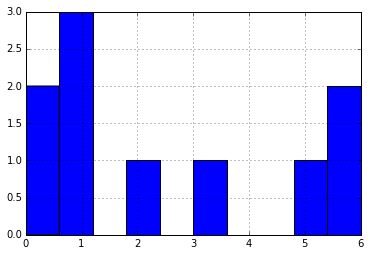

In [56]:
h = s.hist()

### 字符串方法

当 `Series` 或者 `DataFrame` 的某一列是字符串时，我们可以用 `.str` 对这个字符串数组进行字符串的基本操作： 

In [57]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

print s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## 合并

### 连接

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,1.934667,1.461172,1.313419,0.340229
1,0.035388,-0.012870,1.776447,-0.380508
2,-1.656951,0.394022,-0.301339,-1.057380
3,-0.020039,-0.524426,-0.440633,-0.365892
4,-0.227169,1.378818,1.632142,-2.277950
5,1.369058,1.506343,0.096101,1.431508
6,-0.743544,1.329246,-0.185355,0.136838
7,-0.253085,-0.136977,-1.453744,0.789162
8,-1.251507,2.998827,0.036027,0.005348
9,0.320809,1.641301,1.191738,-1.800855


可以使用 `pd.concat` 函数将多个 `pandas` 对象进行连接：

In [59]:
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,1.934667,1.461172,1.313419,0.340229
1,0.035388,-0.012870,1.776447,-0.380508
4,-0.227169,1.378818,1.632142,-2.277950
7,-0.253085,-0.136977,-1.453744,0.789162
8,-1.251507,2.998827,0.036027,0.005348
9,0.320809,1.641301,1.191738,-1.800855


### 数据库中的 Join

`merge` 可以实现数据库中的 `join` 操作：

In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print left
print right

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [61]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

向 `DataFrame` 中添加行：

In [62]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,-0.722707,1.161516,-0.785431,1.282130
1,-0.082231,-0.091028,1.450734,0.230910
2,0.235708,1.226080,0.550681,-0.705881
3,-0.118179,0.454220,1.516288,-0.015742
4,0.606742,0.434194,0.325165,0.068360
5,0.335682,0.621561,1.048368,-0.143368
6,0.424516,-1.350659,2.366333,0.988508
7,-2.753392,-0.364684,2.008352,-0.675984


将第三行的值添加到最后：

In [63]:
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,-0.722707,1.161516,-0.785431,1.282130
1,-0.082231,-0.091028,1.450734,0.230910
2,0.235708,1.226080,0.550681,-0.705881
3,-0.118179,0.454220,1.516288,-0.015742
4,0.606742,0.434194,0.325165,0.068360
5,0.335682,0.621561,1.048368,-0.143368
6,0.424516,-1.350659,2.366333,0.988508
7,-2.753392,-0.364684,2.008352,-0.675984
8,-0.118179,0.454220,1.516288,-0.015742


### Grouping

In [64]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,1.736748,-0.217892
1,bar,one,1.729465,-0.650698
2,foo,two,1.709657,0.014951
3,bar,three,1.106278,-0.485399
4,foo,two,-0.065612,-1.163479
5,bar,two,-0.179473,2.315377
6,foo,one,0.591306,0.721033
7,foo,three,-0.183051,0.567428


按照 `A` 的值进行分类：

In [65]:
df.groupby('A').sum()

,C,D
A,,
bar,2.656270,1.17928
foo,3.789047,-0.07796


按照 `A, B` 的值进行分类：

In [66]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.729465 -0.650698
    three  1.106278 -0.485399
    two   -0.179473  2.315377
foo one    2.328054  0.503141
    three -0.183051  0.567428
    two    1.644045 -1.148528

## 改变形状

### Stack

产生一个多 `index` 的 `DataFrame`：

In [67]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one    -1.817534 -1.498523
      two    -1.363118  1.530734
baz   one     0.289676  0.238916
      two     0.072635 -0.368002
foo   one     0.138828 -0.362204
      two    -1.344299 -1.194688
qux   one    -1.183990 -0.359290
      two    -1.630619 -0.352389

`stack` 方法将 `columns` 变成一个新的 `index` 部分：

In [68]:
df2 = df[:4]

stacked = df2.stack()

stacked

first  second   
bar    one     A   -1.817534
               B   -1.498523
       two     A   -1.363118
               B    1.530734
baz    one     A    0.289676
               B    0.238916
       two     A    0.072635
               B   -0.368002
dtype: float64

可以使用 `unstack()` 将最后一级 `index` 放回 `column`：

In [69]:
stacked.unstack()

A         B
first second                    
bar   one    -1.817534 -1.498523
      two    -1.363118  1.530734
baz   one     0.289676  0.238916
      two     0.072635 -0.368002

也可以指定其他的级别：

In [70]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.817534 -1.363118
      B -1.498523  1.530734
baz   A  0.289676  0.072635
      B  0.238916 -0.368002

## 时间序列

金融分析中常用到时间序列数据：

In [71]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.099893
2012-03-07    0.183583
2012-03-08   -1.940771
2012-03-09    0.115582
2012-03-10    0.135309
Freq: D, dtype: float64

标准时间表示：

In [72]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00   -0.099893
2012-03-07 00:00:00+00:00    0.183583
2012-03-08 00:00:00+00:00   -1.940771
2012-03-09 00:00:00+00:00    0.115582
2012-03-10 00:00:00+00:00    0.135309
Freq: D, dtype: float64

改变时区表示：

In [73]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.099893
2012-03-06 19:00:00-05:00    0.183583
2012-03-07 19:00:00-05:00   -1.940771
2012-03-08 19:00:00-05:00    0.115582
2012-03-09 19:00:00-05:00    0.135309
Freq: D, dtype: float64

## Categoricals

In [74]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


可以将 `grade` 变成类别：

In [75]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别的表示转化为有意义的字符：

In [76]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

添加缺失的类别：

In [77]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

使用 `grade` 分组：

In [78]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

使用 `ggplot` 风格：

In [79]:
plt.style.use('ggplot')

`Series` 绘图：

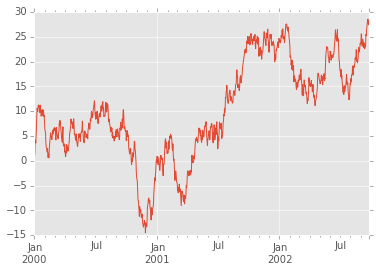

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

p = ts.cumsum().plot()

`DataFrame` 按照 `columns` 绘图：

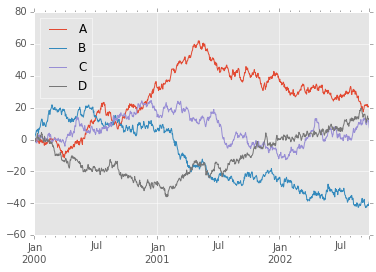

In [81]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df.cumsum().plot()
p = plt.legend(loc="best")

## 文件读写

### csv

写入文件：

In [82]:
df.to_csv('foo.csv')

从文件中读取：

In [83]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.860642,1.003701,0.819662,0.339048
1,2000-01-02,1.131679,0.662693,0.277416,0.143427
2,2000-01-03,-0.498442,1.045115,-0.168274,0.032199
3,2000-01-04,0.624589,0.135273,-0.526203,-1.908017
4,2000-01-05,-0.541080,1.052967,-0.786516,1.382646


### hdf5

写入文件：

In [84]:
df.to_hdf("foo.h5", "df")

读取文件：

In [85]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,-0.860642,1.003701,0.819662,0.339048
2000-01-02,1.131679,0.662693,0.277416,0.143427
2000-01-03,-0.498442,1.045115,-0.168274,0.032199
2000-01-04,0.624589,0.135273,-0.526203,-1.908017
2000-01-05,-0.541080,1.052967,-0.786516,1.382646


### excel

写入文件：

In [86]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取文件：

In [87]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,-0.860642,1.003701,0.819662,0.339048
2000-01-02,1.131679,0.662693,0.277416,0.143427
2000-01-03,-0.498442,1.045115,-0.168274,0.032199
2000-01-04,0.624589,0.135273,-0.526203,-1.908017
2000-01-05,-0.541080,1.052967,-0.786516,1.382646


清理生成的临时文件：

In [88]:
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)